Esse script é o produto do REO3 - Lista de exercícios - da disciplina de Avanços em Genética e Melhoramento de Plantas (PGM848) do Período letivo 2020/1. Para mais informações, acesse: https://github.com/VQCarneiro/Visao-Computacional-no-Melhoramento-de-Plantas

                                UNIVERSIDADE FEDERAL DE LAVRAS - UFLA
                                    DEPARTAMENTO DE BIOLOGIA - DBI
                        PROGRAMA DE PÓS-GRADUÇÃO EM GENÉTICA E MELHORAMENTO DE PLANTAS
                DISCIPLINA PGM848 - AVANÇOS CIENTÍFICOS EM GENÉTICA E MELHORAMENTO DE PLANTAS
                                DOCENTE DSc. VINÍCIUS QUINTÃO CARNEIRO
                                 DISCENTE ERIK MICAEL DA SILVA SOUZA
                              REO3 - PROCESSAMENTO DE IMAGENS EM PYTHON 3

                                        LISTA DE EXERCÍCIOS & RELATÓRIO

Obs.: Importar as bibliotecas necessárias para resolução desta lista de exercícios: numpy, opencv (cv2), matplotlib, pandas & scikit-image (funções).

In [226]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
from skimage.measure import label, regionprops
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage

**EXERCÍCIO 01:**

**Selecione uma imagem a ser utilizada no trabalho prático e realize os seguintes processos utilizando as bibliotecas OPENCV e Scikit-Image do Python:**

**a) Aplique o filtro de média com cinco diferentes tamanhos de kernel e compare os resultados com a imagem original;**

- Na elaboração deste produto (REO3) será utilizada uma imagem de indutores de haploidia do banco de germoplasma de milho da UFLA.

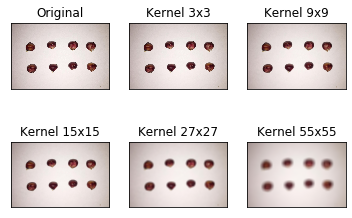

In [175]:
arquivo = 'haploid-inducers.jpeg' 
img_bgr = cv2.imread(arquivo,1) 
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

img_3 = cv2.blur(img_rgb,(3,3))
img_9 = cv2.blur(img_rgb,(9,9))
img_15 = cv2.blur(img_rgb,(15,15))
img_27 = cv2.blur(img_rgb,(27,27))
img_55 = cv2.blur(img_rgb,(55,55))

imagens = [img_rgb,img_3, img_9, img_15, img_27, img_55]
titulos = ['Original','Kernel 3x3','Kernel 9x9', 'Kernel 15x15', 'Kernel 27x27', 'Kernel 55x55']

for i in range(6):
    plt.subplot(2,3,i+1);plt.imshow(imagens[i])
    plt.xticks([]);plt.yticks([])
    plt.title(titulos[i])
plt.show()

**Interpretação:**

Neste exercício, os tamanhos de kernel utilizados em cinco filtros de média foram 3x3, 9x9, 15x15, 27x27 e 55x55, respectivamente. Analisando as imagens resultantes, é possível concluir que, aumentando o número de pixels por Kernel, há também um aumento na suavização da imagem, isto é, um maior desfoque em comparação a imagem original.

**b) Aplique diferentes tipos de filtros com pelo menos dois tamanhos de kernel 
e compare os resultados entre si e com a imagem original.**

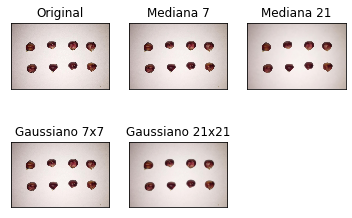

In [215]:
md_7 = cv2.medianBlur(img_rgb,(7))
md_21 = cv2.medianBlur(img_rgb,(21))
gaussian_7 = cv2.GaussianBlur(img_rgb,(7,7),0)
gaussian_21 = cv2.GaussianBlur(img_rgb,(21,21),0)

imagens = [img_rgb,md_7, md_21,gaussian_7, gaussian_21]
titulos = ['Original','Mediana 7','Mediana 21','Gaussiano 7x7', 'Gaussiano 21x21']

for i in range(5):
    plt.subplot(2,3,i+1);plt.imshow(imagens[i])
    plt.xticks([]);plt.yticks([])
    plt.title(titulos[i])
plt.show()

**Interpretação:**

Neste exercício, os filtros do tipo mediana e do tipo gaussiano foram aplicados nas imagens. Os tamanhos de kernel 7x7 e 21x21 foram utilizados em cada tipo de filtro. Analisando as imagens resultantes, é possível concluir que, para o mesmo tamanho de kernel, o filtro do tipo mediana suavizou mais as imagens.

**c) Realize a segmentação da imagem utilizando o processo de limiarização.  Utilizando o reconhecimento de contornos, identifique e salve os objetos de interesse. Além disso, acesse as bibliotecas Opencv e Scikit-Image, verifique as variáveis que podem ser mensuradas e extraia as informações pertinentes (crie e salve uma tabela com estes dados). Apresente todas as imagens 
obtidas ao longo deste processo.**

- Para a execução deste exercício, a imagem utilizada será convertida para o sistema HSV.

In [216]:
img_HSV = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HSV) # Conversão para o sistema HSV
H,S,V = cv2.split(img_HSV) # Partição dos canais
S = cv2.medianBlur(S,21) # Filtro de média no canal S (mais adequado)
hist_S = cv2.calcHist([S],[0], None, [256],[0,256]) # Histograma do canal informativo 
(L, img_limiar) = cv2.threshold(S,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # Limiarização - Thresholding
img_segmentada = cv2.bitwise_and(img_rgb,img_rgb,mask=img_limiar) # Obtendo imagem segmentada

- Exibição da imagem original, da imagem e do histograma do canal S, da imagem limiarizada e da imagem segmentada.

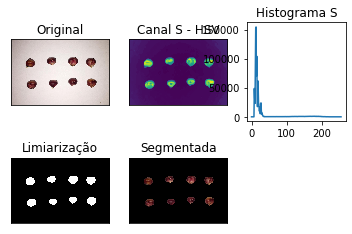

In [220]:
plt.figure('Original')
plt.subplot(2,3,1)
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.title('Original')

plt.subplot(2,3,2)
plt.imshow(S)
plt.xticks([])
plt.yticks([])
plt.title('Canal S - HSV')

plt.subplot(2,3,3)
plt.plot(hist_S)
plt.title('Histograma S')

plt.subplot(2,3,4)
plt.imshow(img_limiar, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Limiarização')

plt.subplot(2,3,5)
plt.imshow(img_segmentada)
plt.xticks([])
plt.yticks([])
plt.title('Segmentada')

plt.show()

- Separação dos objetos, isto é, das sementes da imagem e a caracterização destas.

In [232]:
# Objetos
mask = img_limiar.copy()
_,cnts,h = cv2.findContours(mask, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
dimen = []

# Obtenção dos contornos dos objetos

for (i, c) in enumerate(cnts):

	(x, y, w, h) = cv2.boundingRect(c)
	obj = img_limiar[y:y+h,x:x+w]
	obj_rgb = img_segmentada[y:y+h,x:x+w]
	obj_bgr = cv2.cvtColor(obj_rgb,cv2.COLOR_RGB2BGR)
	cv2.imwrite('sementes dos indutores'+str(i+1)+'.png',obj_bgr)
	cv2.imwrite('Imagem Binaria' + str(i + 1) + '.png', obj)
   
 #Características das medidas dos objetos

	area = cv2.contourArea(c)
	razao = round((h/w), 2)
	perim = round(cv2.arcLength(c, True), 2)
	tam_ret = np.shape(obj)

	regiao = regionprops(obj)
	rm = round(regiao[0].minor_axis_length, 2)
	rmai = round(regiao[0].major_axis_length, 2)
	cen = regiao[0].centroid
	dimen += [[str(i + 1), str(h), str(w), str(area), str(razao),
			   str(perim), str(tam_ret), str(rm), str(rmai), str(cen)]]

#Caracterização- medidas de cor	dos objetos

	print('Medidas de Cor')
	min_val_r, max_val_r, min_loc_r, max_loc_r = cv2.minMaxLoc(obj_rgb[:,:,0], mask=obj)
	print('Valor Mínimo no R: ', min_val_r, ' - Posição: ', min_loc_r)
	print('Valor Máximo no R: ', max_val_r, ' - Posição: ', max_loc_r)
	med_val_r = cv2.mean(obj_rgb[:,:,0], mask=obj)
	print('Média no Vermelho: ', med_val_r)

	min_val_g, max_val_g, min_loc_g, max_loc_g = cv2.minMaxLoc(obj_rgb[:, :, 1], mask=obj)
	print('Valor Mínimo no G: ', min_val_g, ' - Posição: ', min_loc_g)
	print('Valor Máximo no G: ', max_val_g, ' - Posição: ', max_loc_g)
	med_val_g = cv2.mean(obj_rgb[:,:,1], mask=obj)
	print('Média no Verde: ', med_val_g)

	min_val_b, max_val_b, min_loc_b, max_loc_b = cv2.minMaxLoc(obj_rgb[:, :, 2], mask=obj)
	print('Valor Mínimo no B: ', min_val_b, ' - Posição: ', min_loc_b)
	print('Valor Máximo no B: ', max_val_b, ' - Posição: ', max_loc_b)
	med_val_b = cv2.mean(obj_rgb[:,:,2], mask=obj)
	print('Média no Azul: ', med_val_b)

#confecção da tabela

dados_indutores = pd.DataFrame(dimen)
dados_indutores = dados_indutores.rename(columns={0: 'SEMENTE', 1: 'COMPRIMENTO', 2: 'LARGURA', 3: 'AREA', 4: 'RAZAO',
											5: 'PERIMETRO', 6: 'TAMANHO RET', 7:'EIXO MENOR', 8:'EIXO MAIOR',
											9:'CENTROIDE'})
dados_indutores.to_csv('medidas.csv', index=False)

print('Total de objetos: ', len(cnts))

Medidas de Cor
Valor Mínimo no R:  47.0  - Posição:  (85, 71)
Valor Máximo no R:  190.0  - Posição:  (52, 42)
Média no Vermelho:  (80.0035668426309, 0.0, 0.0, 0.0)
Valor Mínimo no G:  4.0  - Posição:  (68, 23)
Valor Máximo no G:  156.0  - Posição:  (53, 43)
Média no Verde:  (33.113282921957484, 0.0, 0.0, 0.0)
Valor Mínimo no B:  15.0  - Posição:  (30, 31)
Valor Máximo no B:  161.0  - Posição:  (53, 43)
Média no Azul:  (41.551291197032384, 0.0, 0.0, 0.0)
Medidas de Cor
Valor Mínimo no R:  28.0  - Posição:  (8, 82)
Valor Máximo no R:  194.0  - Posição:  (60, 81)
Média no Vermelho:  (92.9622511334516, 0.0, 0.0, 0.0)
Valor Mínimo no G:  0.0  - Posição:  (24, 40)
Valor Máximo no G:  137.0  - Posição:  (74, 35)
Média no Verde:  (41.26660753006111, 0.0, 0.0, 0.0)
Valor Mínimo no B:  0.0  - Posição:  (36, 38)
Valor Máximo no B:  134.0  - Posição:  (74, 35)
Média no Azul:  (40.997043169722055, 0.0, 0.0, 0.0)
Medidas de Cor
Valor Mínimo no R:  26.0  - Posição:  (115, 65)
Valor Máximo no R:  229.

PermissionError: [Errno 13] Permission denied: 'medidas.csv'

**Interpretação:**

Com base nos contornos, o número de sementes contabilizadas foram 8. O comprimento das sementes variou entre 8,8 e 11,2 mm, enquanto que a largura variou entre 10,5 e 12,4 mm. A área variou entre 67,9 e 100,3 mm2.

**d) Utilizando máscaras, apresente o histograma somente dos objetos de interesse.**

Objeto #1
6875.5


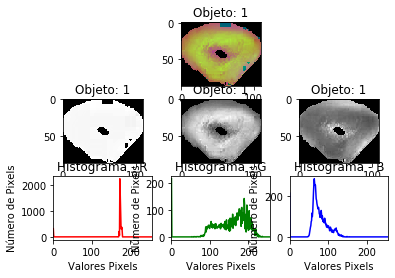

Objeto #2
9983.0


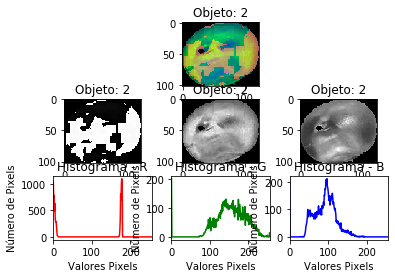

Objeto #3
9915.0


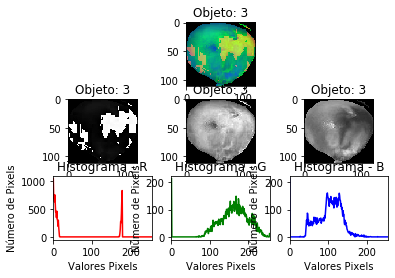

Objeto #4
6799.5


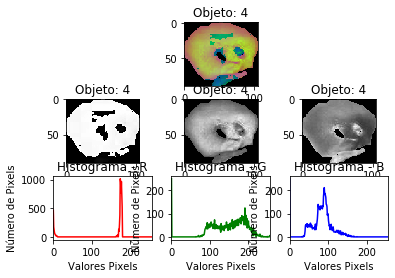

Objeto #5
9387.5


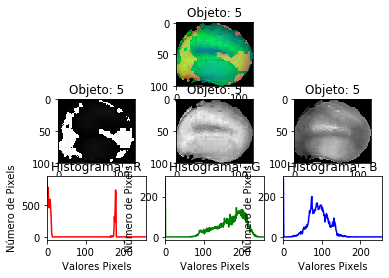

Objeto #6
9880.0


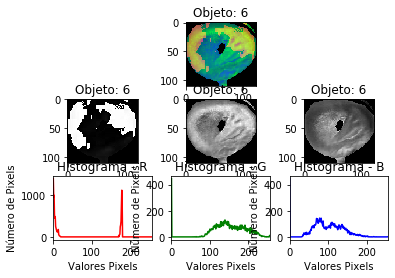

Objeto #7
7593.5


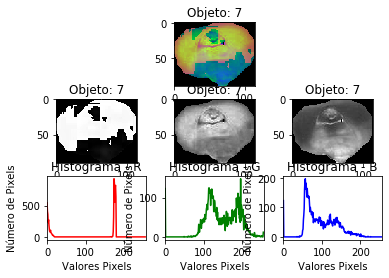

Objeto #8
10030.0


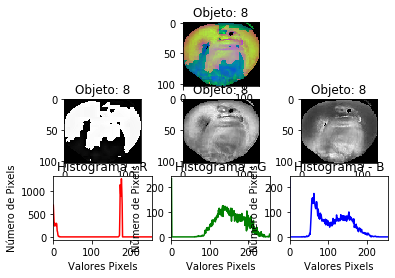

In [233]:
#Conversão da imagem para HSV
img_seg_backup = img_segmentada.copy()
img_seg2 = cv2.cvtColor(img_segmentada,cv2.COLOR_RGB2HSV)

#Recorte dos objetos
plt.figure('Objetos')
for (i, c) in enumerate(cnts):
	(x,y,w,h) = cv2.boundingRect(c)
	print('Objeto #%d' % (i+1))
	print(cv2.contourArea(c))
	obj = img_limiar[y:y+h,x:x+w]
	obj_rgb = img_segmentada2[y:y+h,x:x+w]

#Criação dos histogramas
	grafico = True
	if grafico == True:

		hist_segmentada_r = cv2.calcHist([obj_rgb], [0], obj, [256], [0, 256])
		hist_segmentada_g = cv2.calcHist([obj_rgb], [1], obj, [256], [0, 256])
		hist_segmentada_b = cv2.calcHist([obj_rgb], [2], obj, [256], [0, 256])
		# obj = img_rgb[y:y + h, x:x + w]

#Apresentando as imagens
		plt.subplot(3,3,2)
		plt.imshow(obj_rgb)
		plt.title('Objeto: ' + str(i+1))

		plt.subplot(3, 3, 4)
		plt.imshow(obj_rgb[:,:,0],cmap='gray')
		plt.title('Objeto: ' + str(i + 1))

		plt.subplot(3, 3, 5)
		plt.imshow(obj_rgb[:,:,1],cmap='gray')
		plt.title('Objeto: ' + str(i + 1))

		plt.subplot(3, 3, 6)
		plt.imshow(obj_rgb[:,:,2],cmap='gray')
		plt.title('Objeto: ' + str(i + 1))

		plt.subplot(3, 3, 7)
		plt.plot(hist_segmentada_r, color='r')
		plt.title("Histograma - R")
		plt.xlim([0, 256])
		plt.xlabel("Valores Pixels")
		plt.ylabel("Número de Pixels")

		plt.subplot(3, 3, 8)
		plt.plot(hist_segmentada_g, color='g')
		plt.title("Histograma - G")
		plt.xlim([0, 256])
		plt.xlabel("Valores Pixels")
		plt.ylabel("Número de Pixels")

		plt.subplot(3, 3, 9)
		plt.plot(hist_segmentada_b, color='b')
		plt.title("Histograma - B")
		plt.xlim([0, 256])
		plt.xlabel("Valores Pixels")
		plt.ylabel("Número de Pixels")
		plt.show()

	else:
		pass

**Interpretação:**

Com base nos histogramas dos canais RGB, o canal B tem grande potencial para servir de máscara para segmentação de cada um desses objetos.

**e) Realize a segmentação da imagem utilizando a técnica de k-means. Apresente as imagens obtidas neste processo.**

Dimensão Matriz:  (1091840, 3)
--------------------------------------------------
SQ das Distâncias de Cada Ponto ao Centro:  1535765717.035972
--------------------------------------------------
Dimensão labels:  (1091840, 1)
Valores únicos:  [0 1]
Tipo labels:  <class 'numpy.ndarray'>
--------------------------------------------------
Dimensão flatten labels:  (1091840,)
Tipo labels (f):  <class 'numpy.ndarray'>
--------------------------------------------------
Histograma
[[      0 1007595]
 [      1   84245]]
--------------------------------------------------
Centroides Decimais
[[222.96402  212.21037  209.92418 ]
 [ 97.326385  49.331356  48.375977]]
--------------------------------------------------
Centroides uint8
[[222 212 209]
 [ 97  49  48]]
--------------------------------------------------
Dimensão Matriz Segmentada:  (1091840, 3)
Matriz Segmentada
[[222 212 209]
 [222 212 209]
 [222 212 209]
 [222 212 209]
 [222 212 209]]
--------------------------------------------------


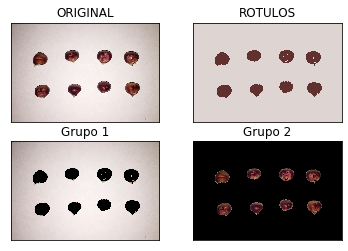

In [213]:
# Formatação da imagem para uma matriz de dados
pixel_values = img_rgb.reshape((-1, 3))

# Conversão para Decimal (para transformar inteiro de 8 bites para decimal)
pixel_values = np.float32(pixel_values)

print('Dimensão Matriz: ',pixel_values.shape)
print('-'*50)

# K-means (Processo iterativo)

# Critério de Parada
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Número de Grupos (k)
k = 2
dist, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

print('SQ das Distâncias de Cada Ponto ao Centro: ', dist)
print('-'*50)

print('Dimensão labels: ', labels.shape)
print('Valores únicos: ',np.unique(labels))
print('Tipo labels: ', type(labels))
# flatten the labels array
labels = labels.flatten()
print('-'*50)

print('Dimensão flatten labels: ', labels.shape)
print('Tipo labels (f): ', type(labels))
print('-'*50)

# Valores dos labels
val_unicos,contagens = np.unique(labels,return_counts=True)
val_unicos = np.reshape(val_unicos,(len(val_unicos),1))
contagens = np.reshape(contagens,(len(contagens),1))
hist = np.concatenate((val_unicos,contagens),axis=1)

print('Histograma')
print(hist)
print('-'*50)
print('Centroides Decimais')
print(centers)
print('-'*50)

# Conversão dos centroides para valores de interos de 8 digitos
centers = np.uint8(centers)

print('Centroides uint8')
print(centers)
print('-'*50)

# Conversão dos pixels para a cor dos centroides
matriz_segmentada = centers[labels]

print('Dimensão Matriz Segmentada: ',matriz_segmentada.shape)
print('Matriz Segmentada')
print(matriz_segmentada[0:5,:])
print('-'*50)

# Reformatar a matriz na imagem de formato original
img_segmentada1 = matriz_segmentada.reshape(img_rgb.shape)

# Grupo 1
original_01 = np.copy(img_rgb)
matriz_or_01 = original_01.reshape((-1, 3))
matriz_or_01[labels != 0] = [0, 0, 0]
img_final_01 = matriz_or_01.reshape(img_rgb.shape)

# Grupo 2
original_02 = np.copy(img_rgb)
matriz_or_02 = original_02.reshape((-1, 3))
matriz_or_02[labels != 1] = [0, 0, 0]
img_final_02 = matriz_or_02.reshape(img_rgb.shape)

# Apresentar Imagem
plt.figure('Imagens')
plt.subplot(2,2,1)
plt.imshow(img_rgb)
plt.title('ORIGINAL')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.imshow(img_segmentada1)
plt.title('ROTULOS')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,3)
plt.imshow(img_final_01)
plt.title('Grupo 1')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,4)
plt.imshow(img_final_02)
plt.title('Grupo 2')
plt.xticks([])
plt.yticks([])

plt.show()

**f) Realize a segmentação da imagem utilizando a técnica de watershed. Apresente as imagens obtidas neste processo.**

Número de Picos
(array([False,  True]), array([1091831,       9], dtype=int64))
--------------------------------------------------
Análise de conectividade - Marcadores
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1091831,       1,       1,       1,       1,       1,       1,
             1,       1,       1], dtype=int64))
--------------------------------------------------
Imagem Segmentada - Watershed
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1020156,    7738,   10193,   10043,    9547,    3477,    3455,
         10076,    7009,   10146], dtype=int64))
Número de sementes:  9


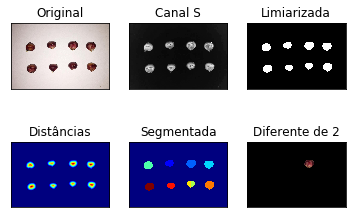

--------------------------------------------------


In [230]:
#Segmentação
limiar, mascara = cv2.threshold(S,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#Picos
img_dist = ndimage.distance_transform_edt(mascara)
max_local = peak_local_max(img_dist, indices=False, min_distance=100, labels=mascara)

print('Número de Picos')
print(np.unique(max_local,return_counts=True))
print('-'*50)

#Marcadores
marcadores,n_marcadores = ndimage.label(max_local, structure=np.ones((3, 3)))

print('Análise de conectividade - Marcadores')
print(np.unique(marcadores,return_counts=True))
print('-'*50)

img_ws = watershed(-img_dist, marcadores, mask=mascara)

print('Imagem Segmentada - Watershed')
print(np.unique(img_ws,return_counts=True))
print("Número de sementes: ", len(np.unique(img_ws)) - 1)

#Acessando um objeto
img_final = np.copy(img_rgb)
img_final[img_ws != 2] = [0,0,0]

#Apresentação das imagens
plt.figure('Watershed')
plt.subplot(2,3,1)
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.title('Original')

plt.subplot(2,3,2)
plt.imshow(s,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Canal S')

plt.subplot(2,3,3)
plt.imshow(mascara,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Limiarizada')

plt.subplot(2,3,4)
plt.imshow(img_dist,cmap='jet')
plt.xticks([])
plt.yticks([])
plt.title('Distâncias')

plt.subplot(2,3,5)
plt.imshow(img_ws,cmap='jet')
plt.xticks([])
plt.yticks([])
plt.title('Segmentada')

plt.subplot(2,3,6)
plt.imshow(img_final)
plt.xticks([])
plt.yticks([])
plt.title('Diferente de 2')

plt.show()

print('-'*50)

**g) Compare os resultados das três formas de segmentação (limiarização, k-means e watershed e identifique as potencialidades de cada delas.**

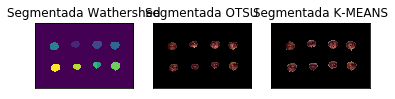

In [231]:
plt.figure('Imagens')
plt.subplot(1,3,1)
plt.imshow(img_ws)
plt.xticks([])
plt.yticks([])
plt.title('Segmentada Wathershed')

plt.subplot(1,3,2)
plt.imshow(img_segmentada)
plt.xticks([])
plt.yticks([])
plt.title('Segmentada OTSU')

plt.subplot(1,3,3)
plt.imshow(img_final_02)
plt.title('Segmentada K-MEANS')
plt.xticks([])
plt.yticks([])

plt.show()